# Simpson’s Paradox: Gender Bias

## 📌 Objective
To analyze university admission data by gender and department, demonstrating Simpson’s Paradox where trends in aggregated data differ from those in subgroups and to investigate the presence of gender bias.

## 🧠 Background
Simpson’s Paradox occurs when a trend appears in several groups but reverses or disappears when the groups are combined. This problem is famously illustrated by the UC Berkeley admissions data, first widely discussed in Bickel et al. (1975):
[Simpson’s Paradox: UC Berkeley Admission Data](https://en.wikipedia.org/wiki/Simpson%27s_paradox#Berkeley_admissions_data)


## 🎲 Simulation

In [24]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Create a DataFrame with the given data on applicants and admission rates:

data = {
    'Department': ['A', 'B', 'C', 'D', 'E', 'F', 'Total'],
    'All': [933, 585, 918, 792, 584, 714, 4526],
    'Men': [825, 560, 325, 417, 191, 373, 2691],
    'Women': [108, 25, 593, 375, 393, 341, 1835],
    'All Admitted': ['64%', '63%', '35%', '34%', '25%', '6%', '39%'],
    'Men Admitted': ['62%', '63%', '37%', '33%', '28%', '6%', '45%'],
    'Women Admitted': ['82%', '68%', '34%', '35%', '24%', '7%', '30%']
}

df = pd.DataFrame(data)
df

,Department,All,Men,Women,All Admitted,Men Admitted,Women Admitted
0,A,933,825,108,64%,62%,82%
1,B,585,560,25,63%,63%,68%
2,C,918,325,593,35%,37%,34%
3,D,792,417,375,34%,33%,35%
4,E,584,191,393,25%,28%,24%
5,F,714,373,341,6%,6%,7%
6,Total,4526,2691,1835,39%,45%,30%


In [26]:
# Convert percentage strings to numeric values:
def convert_percent(value):
    return float(value.strip('%')) / 100

for col in ['All Admitted', 'Men Admitted', 'Women Admitted']:
    df[col] = df[col].apply(convert_percent)

# Calculate the number of admitted men and women per department:

df['Men Admitted Count'] = (df['Men'] * df['Men Admitted']).round().astype(int)
df['Women Admitted Count'] = (df['Women'] * df['Women Admitted']).round().astype(int)
df['Total Admitted Count'] = df['Men Admitted Count'] + df['Women Admitted Count']

df

,Department,All,Men,Women,All Admitted,Men Admitted,Women Admitted,Men Admitted Count,Women Admitted Count,Total Admitted Count
0,A,933,825,108,0.64,0.62,0.82,512,89,601
1,B,585,560,25,0.63,0.63,0.68,353,17,370
2,C,918,325,593,0.35,0.37,0.34,120,202,322
3,D,792,417,375,0.34,0.33,0.35,138,131,269
4,E,584,191,393,0.25,0.28,0.24,53,94,147
5,F,714,373,341,0.06,0.06,0.07,22,24,46
6,Total,4526,2691,1835,0.39,0.45,0.30,1211,550,1761


In [27]:
# Calculate overall admission rates by gender and compare:
total_men_admitted = df.loc[df['Department'] != 'Total', 'Men Admitted Count'].sum()
total_women_admitted = df.loc[df['Department'] != 'Total', 'Women Admitted Count'].sum()
total_men_applicants = df.loc[df['Department'] != 'Total', 'Men'].sum()
total_women_applicants = df.loc[df['Department'] != 'Total', 'Women'].sum()

overall_men_admission_rate = total_men_admitted / total_men_applicants
overall_women_admission_rate = total_women_admitted / total_women_applicants

# Print the results with explanatory text
print(f"Overall male admission rate: {overall_men_admission_rate:.2%}")
print(f"Overall female admission rate: {overall_women_admission_rate:.2%}")


Overall male admission rate: 44.52%
Overall female admission rate: 30.35%


## 📊 Visualization


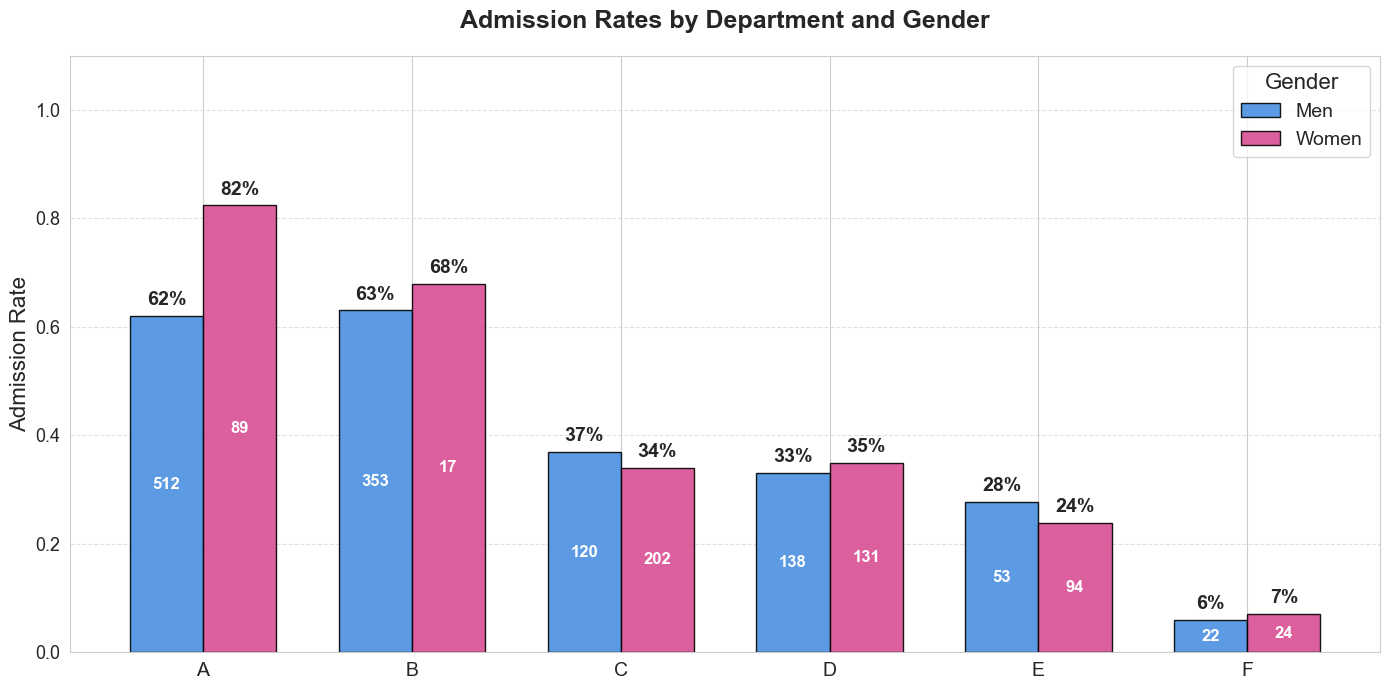

In [28]:
# Set visual style using Seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(14, 7))
bar_width = 0.35
x = range(len(department_df))

# Define bar colors
men_color = '#4A90E2'      # Blue for men
women_color = '#D94F92'    # Pink for women

# Plot men bars
bars_men = plt.bar(
    [i - bar_width / 2 for i in x],
    department_df['Men Admitted Rate'],
    width=bar_width,
    color=men_color,
    edgecolor='black',
    label='Men',
    alpha=0.9
)

# Plot women bars
bars_women = plt.bar(
    [i + bar_width / 2 for i in x],
    department_df['Women Admitted Rate'],
    width=bar_width,
    color=women_color,
    edgecolor='black',
    label='Women',
    alpha=0.9
)

# Add text annotations with larger font size
for i in x:
    men_rate = department_df['Men Admitted Rate'].iloc[i]
    women_rate = department_df['Women Admitted Rate'].iloc[i]
    men_count = department_df['Men Admitted Count'].iloc[i]
    women_count = department_df['Women Admitted Count'].iloc[i]

    # Show % above each bar
    plt.text(i - bar_width/2, men_rate + 0.02,
             f"{men_rate:.0%}", ha='center', fontsize=14, weight='bold')
    plt.text(i + bar_width/2, women_rate + 0.02,
             f"{women_rate:.0%}", ha='center', fontsize=14, weight='bold')

    # Show admitted counts inside each bar
    plt.text(i - bar_width/2, men_rate / 2,
             f"{int(men_count)}", ha='center', va='center', fontsize=12, color='white', weight='bold')
    plt.text(i + bar_width/2, women_rate / 2,
             f"{int(women_count)}", ha='center', va='center', fontsize=12, color='white', weight='bold')

# Final formatting with bigger fonts
plt.xticks(x, department_df['Department'], fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Admission Rate", fontsize=16)
plt.ylim(0, 1.1)
plt.title("Admission Rates by Department and Gender", fontsize=18, weight='bold', pad=20)
plt.legend(title="Gender", fontsize=14, title_fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


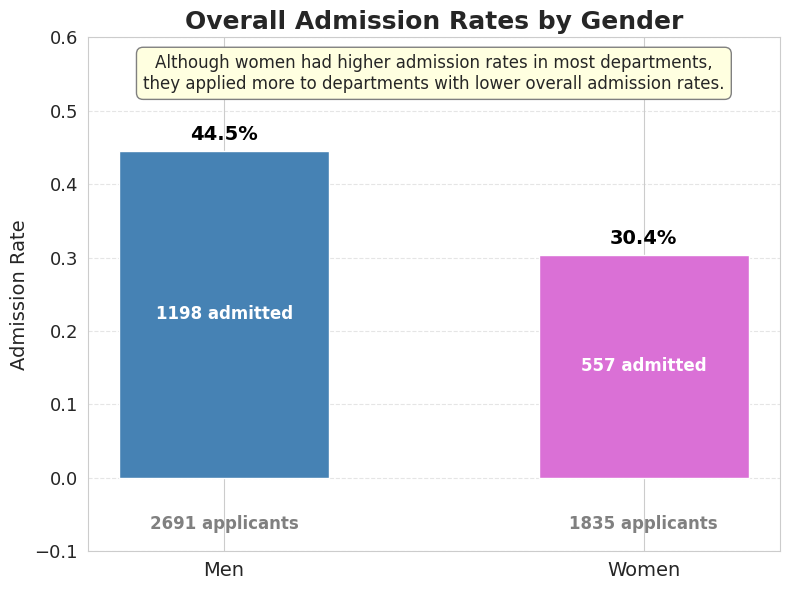

In [29]:
# Set seaborn style and font that supports emoji
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# Admission rates data
labels = ['Men', 'Women']
rates = [overall_men_admission_rate, overall_women_admission_rate]
colors = ['steelblue', 'orchid']

# Total admitted counts and applicants (replace with your actual values)
total_men_admitted = df.loc[df['Department'] != 'Total', 'Men Admitted Count'].sum()
total_women_admitted = df.loc[df['Department'] != 'Total', 'Women Admitted Count'].sum()
total_men_applicants = df.loc[df['Department'] != 'Total', 'Men'].sum()
total_women_applicants = df.loc[df['Department'] != 'Total', 'Women'].sum()

# Create the figure
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, rates, color=colors, width=0.5)

# Annotate each bar with the exact percentage, admitted count and total applicants
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
             f'{height:.1%}', ha='center', va='bottom',
             fontsize=14, fontweight='bold', color='black')

    # Add admitted counts inside the bar (white text)
    admitted_count = total_men_admitted if i == 0 else total_women_admitted
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2,
             f'{int(admitted_count)} admitted', ha='center', va='center',
             fontsize=12, fontweight='bold', color='white')

    # Add total applicants count below the bar
    applicants_count = total_men_applicants if i == 0 else total_women_applicants
    plt.text(bar.get_x() + bar.get_width() / 2, -0.05,
             f'{int(applicants_count)} applicants', ha='center', va='top',
             fontsize=12, fontweight='bold', color='gray')

# Title and labels
plt.title("Overall Admission Rates by Gender", fontsize=18, fontweight='bold')
plt.ylabel("Admission Rate", fontsize=14)
plt.ylim(-0.1, 0.6)  # extend y-limit down to fit applicants count
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)

# Add explanatory annotation
plt.text(0.5, 0.53,
         "Although women had higher admission rates in most departments,\n"
         "they applied more to departments with lower overall admission rates.",
         ha='center', fontsize=12,
         bbox=dict(facecolor='lightyellow', edgecolor='gray', boxstyle='round,pad=0.4'))

# Add subtle grid
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## ☝️Outcomes
This analysis shows how Simpson’s Paradox can make overall statistics misleading. Although women appear to have a lower admission rate overall, they actually perform better or equally well within most departments.

## 🤔 What to keep in mind in real life:
- Don’t judge decisions by aggregate data alone. Overall numbers can hide important details that affect fairness and accuracy.
- Look deeper into subgroups or categories. Context matters — different groups may have different behaviors or conditions influencing the results.
- Be cautious in interpreting “bias” or “discrimination.” Sometimes, apparent disparities arise from underlying factors like preferences or distribution across groups.
- Make data-driven decisions thoughtfully. Dig into the data structure before drawing conclusions or making policy changes.
- Communicate clearly. When presenting data, highlight how group-level effects might differ from overall trends to avoid misunderstandings.

**In short, real-world data is often complex, and understanding these nuances helps create fairer, more effective analyses and decisions.**